In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from nltk.tokenize import word_tokenize
import re
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import random
import math
import gc
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.naive_bayes import BernoulliNB 
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer



In [2]:
lemmatizer=WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [3]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\news1.csv") 
df.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13396\2011816544.py:1: DtypeWarning: Columns (24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\Lenovo\Downloads\news1.csv")


,Unnamed: 0,title,text,label,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 131,Unnamed: 132,Unnamed: 133,Unnamed: 134,Unnamed: 135,Unnamed: 136,Unnamed: 137,Unnamed: 138,Unnamed: 139,Unnamed: 140
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


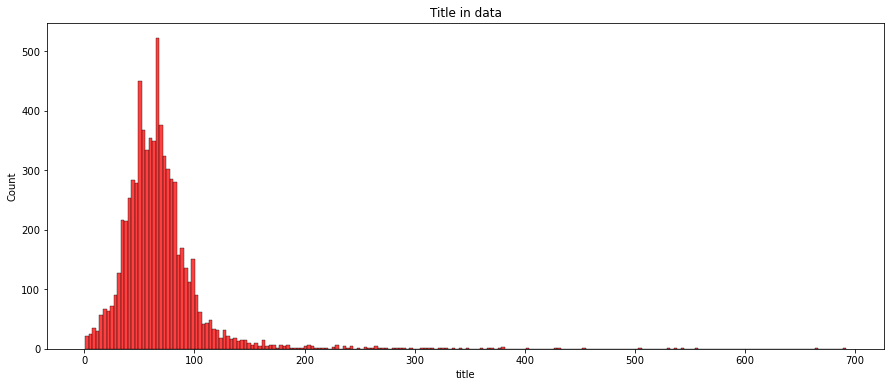

In [4]:
df_title=df['title'].str.len()
fig,ax=plt.subplots(figsize=(15,6))
sns.histplot(df_title,ax=ax,color='red')
ax.set_title('Title in data')
plt.show()

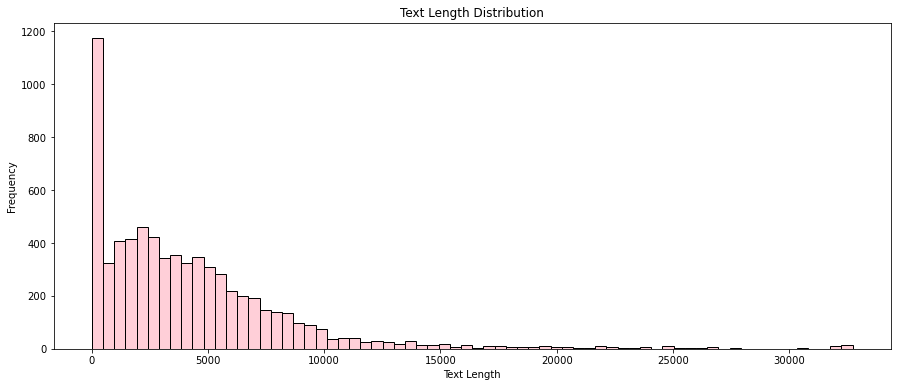

In [5]:
df_text = df['text'].str.len()

fig, ax = plt.subplots(figsize=(15, 6))
sns.histplot(df_text, ax=ax, color='pink')

ax.set_title('Text Length Distribution')
ax.set_xlabel('Text Length')
ax.set_ylabel('Frequency')

plt.show()

In [4]:
df.columns.to_list()
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('title', axis=1, inplace=True)
df = df.filter(regex='^(?!Unnamed).*')
df = df.dropna()
df = df[df['label'].isin(['REAL', 'FAKE'])]
df.head()

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL


In [7]:
print(df)

                                                   text label
0     Daniel Greenfield, a Shillman Journalism Fello...  FAKE
1     Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE
2     U.S. Secretary of State John F. Kerry said Mon...  REAL
3     — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE
4     It's primary day in New York and front-runners...  REAL
...                                                 ...   ...
7790  The State Department told the Republican Natio...  REAL
7791  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...  FAKE
7792   Anti-Trump Protesters Are Tools of the Oligar...  FAKE
7793  ADDIS ABABA, Ethiopia —President Obama convene...  REAL
7794  Jeb Bush Is Suddenly Attacking Trump. Here's W...  REAL

[6315 rows x 2 columns]


In [8]:
print(df['label'].value_counts())


REAL    3161
FAKE    3154
Name: label, dtype: int64


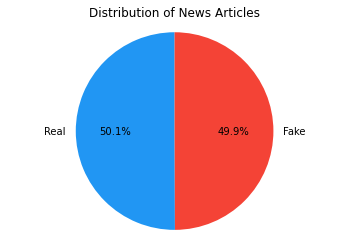

In [5]:
labels = ['Real', 'Fake']  # Make sure the number of labels matches the number of counts
counts = df['label'].value_counts().values

if len(labels) != len(counts):
    raise ValueError("The number of labels does not match the number of counts.")

plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#2196f3', '#f44336'])
plt.axis('equal')
plt.title("Distribution of News Articles")
plt.show()

In [6]:
df['label'] = df['label'].replace("REAL", 1)
df['label'] = df['label'].replace("FAKE", 0)
df.head()

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,U.S. Secretary of State John F. Kerry said Mon...,1
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,It's primary day in New York and front-runners...,1


In [7]:
y=df['label']
X=df.drop('label',axis=1)
X=df.drop('label',axis=1)

In [8]:

corpus = []
for text in df['text']:
    rev = re.sub('[^a-zA-Z]', ' ', text)
    rev = rev.lower()
    rev = rev.split()
    rev = [lemmatizer.lemmatize(word) for word in rev if word not in stop_words]
    rev = ' '.join(rev)
    corpus.append(rev)

In [9]:
len(corpus)


6315

In [10]:

tfidf_v=TfidfVectorizer(max_features=8000,ngram_range=(1,2))
X=tfidf_v.fit_transform(corpus).toarray()

In [11]:
X=pd.DataFrame(X,columns=tfidf_v.get_feature_names_out())

In [16]:
X

,aaron,abandon,abandoned,abandoning,abc,abc news,abdeslam,abdullah,abedin,ability,...,youth,youtube,zarif,zero,zero hedge,zika,zionist,zone,zone syria,zulu
0,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.027875,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.063074,0.07512,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.061373,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6310,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
6311,0.0,0.0,0.023914,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
6312,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.024651,0.0,0.0,0.0
6313,0.0,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0


In [17]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7790    1
7791    0
7792    0
7793    1
7794    1
Name: label, Length: 6315, dtype: int64

In [12]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [56]:
classi=MultinomialNB()
classi.fit(X_train,y_train)

MultinomialNB()

In [57]:
y_pred=classi.predict(X_test)

In [58]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [59]:
cm=confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)


0.8822039265357822

<AxesSubplot:>

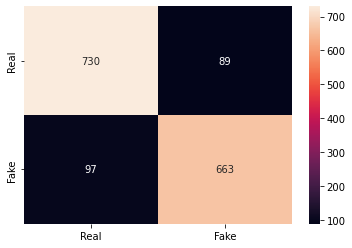

In [60]:
sns.heatmap(cm,annot=True,fmt='.4g',xticklabels=['Real','Fake'],yticklabels=['Real','Fake'])

In [61]:
# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Precision: 0.8816489361702128
Recall: 0.8723684210526316
F1 Score: 0.876984126984127


In [62]:
classi=BernoulliNB()
classi.fit(X_train,y_train)

BernoulliNB()

In [63]:
y_pred=classi.predict(X_test)

In [64]:
cm=confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)

0.8074730842305257

<AxesSubplot:>

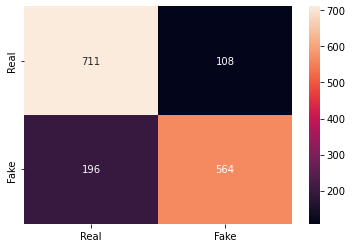

In [65]:
sns.heatmap(cm,annot=True,fmt='.4g',xticklabels=['Real','Fake'],yticklabels=['Real','Fake'])

In [66]:
# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Precision: 0.8392857142857143
Recall: 0.7421052631578947
F1 Score: 0.7877094972067039


In [13]:
from sklearn.linear_model import PassiveAggressiveClassifier
passive=PassiveAggressiveClassifier()
passive.fit(X_train,y_train)

PassiveAggressiveClassifier()

In [14]:
y_passive=passive.predict(X_test)
cm=confusion_matrix(y_test,y_passive)
accuracy_score(y_test,y_passive)

0.9373020899303357

<AxesSubplot:>

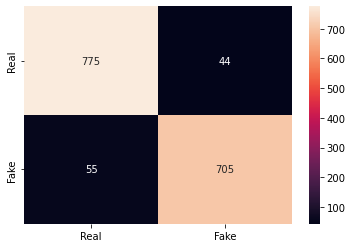

In [15]:
sns.heatmap(cm,annot=True,fmt='.4g',xticklabels=['Real','Fake'],yticklabels=['Real','Fake'])

In [55]:
# Calculate precision
precision = precision_score(y_test, y_passive)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_passive)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_passive)
print("F1 Score:", f1)

Precision: 0.9412550066755674
Recall: 0.9276315789473685
F1 Score: 0.9343936381709742


In [16]:
from sklearn import svm
s= svm.SVC(kernel='linear')
s.fit(X_train,y_train)


SVC(kernel='linear')

In [17]:
y_svm=s.predict(X_test)

In [18]:
cm=confusion_matrix(y_test,y_svm)
accuracy_score(y_test,y_svm)

0.9404686510449651

<AxesSubplot:>

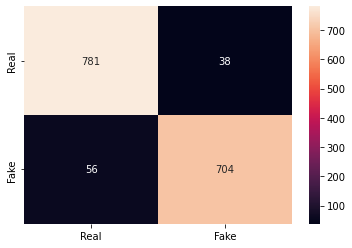

In [19]:
sns.heatmap(cm,annot=True,fmt='.4g',xticklabels=['Real','Fake'],yticklabels=['Real','Fake'])

In [51]:
# Calculate precision
precision = precision_score(y_test, y_svm)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_svm)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_svm)
print("F1 Score:", f1)

Precision: 0.9487870619946092
Recall: 0.9263157894736842
F1 Score: 0.9374167776298269


In [24]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train,y_train)


RandomForestClassifier(random_state=42)

In [25]:
y_rf=clf.predict(X_test)


In [26]:
cm=confusion_matrix(y_test,y_rf)
accuracy_score(y_test,y_rf)

0.9062697910069665

<AxesSubplot:>

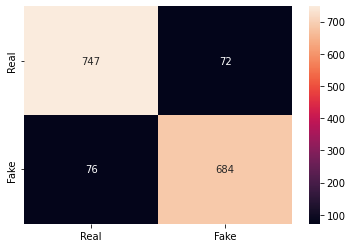

In [27]:
sns.heatmap(cm,annot=True,fmt='.4g',xticklabels=['Real','Fake'],yticklabels=['Real','Fake'])

In [52]:
# Calculate precision
precision = precision_score(y_test, y_rf)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_rf)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_rf)
print("F1 Score:", f1)

Precision: 0.9047619047619048
Recall: 0.9
F1 Score: 0.9023746701846965


In [28]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

gbc.fit(X, y)

GradientBoostingClassifier()

In [29]:
y_gbc=gbc.predict(X_test)

In [30]:
accuracy_score(y_test,y_gbc)

0.9252691576947435

<AxesSubplot:>

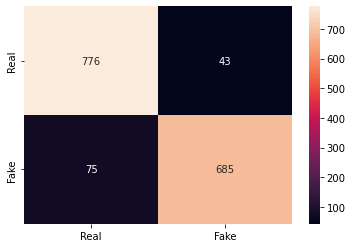

In [31]:
cm=confusion_matrix(y_test,y_gbc)
sns.heatmap(cm,annot=True,fmt='.4g',xticklabels=['Real','Fake'],yticklabels=['Real','Fake'])

In [53]:
# Calculate precision
precision = precision_score(y_test, y_gbc)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_gbc)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_gbc)
print("F1 Score:", f1)

Precision: 0.9409340659340659
Recall: 0.9013157894736842
F1 Score: 0.9206989247311828


In [39]:
clf = svm.SVC(kernel='sigmoid', degree =5,C=2)
clf.fit(X_train,y_train)
y_pred_svm = clf.predict(X_test)
accuracy_score(y_test,y_pred_svm)

0.9303356554781508

<AxesSubplot:>

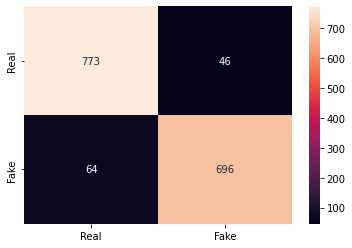

In [40]:
cm=confusion_matrix(y_test,y_pred_svm)
sns.heatmap(cm,annot=True,fmt='.4g',xticklabels=['Real','Fake'],yticklabels=['Real','Fake'])

In [54]:
# Calculate precision
precision = precision_score(y_test, y_pred_svm)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred_svm)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_svm)
print("F1 Score:", f1)

Precision: 0.9380053908355795
Recall: 0.9157894736842105
F1 Score: 0.9267643142476697
